In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import seaborn as sns
import plotly.express as px

%matplotlib inline

In [ ]:
# Set DPI for fugures

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [ ]:
# Set the default font size and weight
plt.rcParams['font.size'] = 20
plt.rcParams['font.weight'] = 'bold'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing Dataset
NHIS2022 = pd.read_csv('/content/drive/MyDrive/Myocardial Infarction (MI)/Dataset/adult22.csv')

In [ ]:
# Dataset size (row, column)
NHIS2022.shape

(27651, 637)

In [ ]:
# Target label data count hueing class
class_counts = NHIS2022['MIEV_A'].value_counts()

print(class_counts)

MIEV_A
2    26591
1     1017
7       26
9       17
Name: count, dtype: int64


In [ ]:
# Selected Features

NHIS2022 = NHIS2022[["MARITAL_A", "HOUTENURE_A", "AFVET_A", "HEIGHTTC_A", "HISPALLP_A", "SEX_A", "PCNTLT18TC", "MAXEDUCP_A", "RATCAT_A", "COPDEV_A", "CHDEV_A", "DEPEV_A", "DIBEV_A", "ARTHEV_A", "STREV_A", "ASEV_A", "CHLEV_A", "HYPEV_A", "PHSTAT_A", "BMICAT_A", "VISIONDF_A", "DIFF_A", "SOCERRNDS_A", "DRKSTAT_A", "MODTPR_A", "FRJUICNO_A", "SHTFLU12M_A", "MIEV_A", "COGMEMDFF_A"]]

In [ ]:
NHIS2022.shape

(27651, 29)

In [ ]:
# Selected Features

NHIS2022 = NHIS2022[[
    "MARITAL_A", "AFVET_A", "HEIGHTTC_A", "HISPALLP_A", "SEX_A", "MAXEDUCP_A",
    "RATCAT_A", "COPDEV_A", "CHDEV_A", "DEPEV_A", "DIBEV_A", "STREV_A",
    "ASEV_A", "CHLEV_A", "HYPEV_A", "PHSTAT_A", "SOCERRNDS_A", "DRKSTAT_A",
    "MODTPR_A", "MIEV_A", "COGMEMDFF_A"
]]

In [ ]:
NHIS2022.shape

(27651, 21)

In [ ]:
Residential status, Children count, Arthritis, BMI level, Difficulty seeing, Difficulty walking, Fruit consumption, Flu vaccination

In [ ]:
# Count the total number of rows with missing values
total_rows_with_missing = NHIS2022.isnull().any(axis=1).sum()

print(f'Total rows with missing values: {total_rows_with_missing}')

Total rows with missing values: 88


In [ ]:
# Define the refuse values for each column
refuse_values = {
    'HISPALLP_A': [97, 98, 99],
    'MAXEDUCP_A': [97, 98, 99],
    'RATCAT_A': [98],
    'DRKSTAT_A': [],  # No refuse values specified for this column
    'FRJUICNO_A': [997, 998, 999],
}

# Initialize a variable to count the number of rows with refuse values
rows_with_refuse_values = 0

# Iterate through columns and count rows with refuse values
for column, refuse in refuse_values.items():
    if column in NHIS2022.columns:
        rows_with_refuse_values += len(NHIS2022[NHIS2022[column].isin(refuse)])

# For columns without specified refuse values, count rows with refuse values
for column in NHIS2022.columns:
    if column not in refuse_values:
        refuse = [7, 8, 9, 97, 98, 99]
        rows_with_refuse_values += len(NHIS2022[NHIS2022[column].isin(refuse)])

# Print the total number of rows with refuse values
print(f'Total number of rows with refuse values: {rows_with_refuse_values}')

Total number of rows with refuse values: 7400


In [ ]:
# Droping all null values
NHIS2022 = NHIS2022.dropna()

In [ ]:
# Define the refuse values for each column
refuse_values = {
    'HISPALLP_A': [97, 98, 99],
    'MAXEDUCP_A': [97, 98, 99],
    'RATCAT_A': [98],
    'DRKSTAT_A': [],  # No refuse values specified for this column
    'FRJUICNO_A': [997, 998, 999],
}

# Iterate through columns and remove rows with refuse values
for column, refuse in refuse_values.items():
    if column in NHIS2022.columns:
        NHIS2022 = NHIS2022[~NHIS2022[column].isin(refuse)]

# For columns without specified refuse values, you can still remove rows with the specified refuse values
for column in NHIS2022.columns:
    if column not in refuse_values:
        refuse = [7, 8, 9, 97, 98, 99]
        NHIS2022 = NHIS2022[~NHIS2022[column].isin(refuse)]

In [ ]:
# Dataset size (row, column)
NHIS2022.shape

(25975, 21)

In [ ]:
NHIS2022.isnull().sum()

,0
MARITAL_A,0
HOUTENURE_A,0
AFVET_A,0
HEIGHTTC_A,0
HISPALLP_A,0
SEX_A,0
PCNTLT18TC,0
MAXEDUCP_A,0
RATCAT_A,0
COPDEV_A,0


In [ ]:
# Target label class count
unique_classes = NHIS2022['COGMEMDFF_A'].nunique()
print(unique_classes)

4


In [ ]:
# Target label data count hueing class
class_counts = NHIS2022['COGMEMDFF_A'].value_counts()

print(class_counts)

COGMEMDFF_A
1    19886
2     4691
3      608
4       14
Name: count, dtype: int64


In [ ]:
# Map the classes 3 and 4 to 2
NHIS2022['COGMEMDFF_A'] = NHIS2022['COGMEMDFF_A'].replace({3: 2, 4: 2})

# Check the new distribution
class_counts = NHIS2022['COGMEMDFF_A'].value_counts()
print(class_counts)

COGMEMDFF_A
1    20492
2     5483
Name: count, dtype: int64


In [ ]:
# Separating data
Healthy = NHIS2022[NHIS2022['COGMEMDFF_A']==1]
Affected = NHIS2022[NHIS2022['COGMEMDFF_A']==2]

In [ ]:
# Input & Target dataset split hueing class

from sklearn.model_selection import train_test_split


trainhealthy, testhealthy = train_test_split(Healthy,test_size=0.30, random_state=42)
trainAffected, testAffected = train_test_split(Affected,test_size=0.1, random_state=42)

In [ ]:
# Train and Test
train = pd.concat([trainhealthy, trainAffected], axis=0)
test = pd.concat([testhealthy, testAffected], axis=0)

In [ ]:
# shuffling
train = train.sample(frac=1.0, random_state=42)
test = test.sample(frac=1.0, random_state=42)

In [ ]:
# Labeling
x_train = train.drop(['COGMEMDFF_A'], axis=1) # Input features
y_train = train['COGMEMDFF_A'] # Target label

x_test = test.drop(['COGMEMDFF_A'], axis=1) # Input features
y_test = test['COGMEMDFF_A'] # Target label

In [ ]:
# Update y_train and y_test to reflect the new encoding
y_train = np.array([0 if val == 1 else 1 for val in y_train])
y_test = np.array([0 if val == 1 else 1 for val in y_test])

In [ ]:
# Count the occurrences of class 0 and class 1 in train set
class_0_count = np.sum(y_train == 0)
class_1_count = np.sum(y_train == 1)

print("Class 0 count:", class_0_count)
print("Class 1 count:", class_1_count)

Class 0 count: 13920
Class 1 count: 4781


In [ ]:
# Count the occurrences of class 0 and class 1 in test set
class_0_count = np.sum(y_test == 0)
class_1_count = np.sum(y_test == 1)

print("Class 0 count:", class_0_count)
print("Class 1 count:", class_1_count)

Class 0 count: 5966
Class 1 count: 532


In [ ]:
# Target label class count
unique_classes = NHIS2022['COGMEMDFF_A'].nunique()
print(unique_classes)

2


In [ ]:
# Target label data count hueing class
class_counts = NHIS2022['COGMEMDFF_A'].value_counts()

print(class_counts)

COGMEMDFF_A
1    19886
2     5313
Name: count, dtype: int64


# Cost Sensitive Learning

In [ ]:
# Impoting libaries for pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [ ]:
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Add, Multiply, BatchNormalization, GlobalAveragePooling1D, Reshape
from tensorflow.keras.models import Model
import tensorflow as tf
import numpy as np
from sklearn.utils import class_weight

# Define a function to calculate class weights with an increasing factor
def get_class_weights(y_train, factor):
    classes = np.unique(y_train)
    class_weights = class_weight.compute_class_weight('balanced', classes=classes, y=y_train)
    class_weights_dict = {c: w * factor for c, w in zip(classes, class_weights)}
    return class_weights_dict

# Define a function to create the model
def novel_improved_model(input_shape):
    input_layer = Input(shape=input_shape)

    conv1 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(input_layer)
    conv2 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(conv1)
    conv3 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(conv2)

    # Channel-wise Attention Block
    attention = GlobalAveragePooling1D()(conv3)
    attention = Dense(64, activation='sigmoid')(attention)
    attention = Reshape((1, 64))(attention)
    attention = Multiply()([conv3, attention])

    # Skip connection and batch normalization
    skip_connection = Add()([conv1, attention])
    skip_connection = BatchNormalization()(skip_connection)

    pool = MaxPooling1D(pool_size=2)(skip_connection)

    # Flatten and fully connected layers
    flatten = Flatten()(pool)

    dense1 = Dense(128, activation='relu')(flatten)
    dense1 = BatchNormalization()(dense1)

    dense2 = Dense(64, activation='relu')(dense1)
    dense2 = BatchNormalization()(dense2)

    output = Dense(1, activation='sigmoid')(dense2)

    model = Model(inputs=input_layer, outputs=output)
    return model

# Create the novel model
input_shape = (x_train.shape[1], 1)
novel_model_instance = novel_improved_model(input_shape)

# Compile the model
novel_model_instance.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Set an initial factor for class weight increase
factor = 1

# Train the novel model for multiple epochs with increasing class weights
for epoch in range(50):
    class_weights_dict = get_class_weights(y_train, factor)
    novel_model_instance.fit(x_train, y_train, epochs=1, batch_size=64, validation_data=(x_test, y_test), class_weight=class_weights_dict)
    factor += 0.1  # Increase the factor for the next epoch

# Evaluate the novel model
loss, accuracy = novel_model_instance.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

293/293 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.6638 - loss: 0.6275 - val_accuracy: 0.8319 - val_loss: 0.4054
293/293 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.7142 - loss: 0.6294 - val_accuracy: 0.8881 - val_loss: 0.2796
293/293 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.7216 - loss: 0.6779 - val_accuracy: 0.4825 - val_loss: 0.8595
293/293 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.7226 - loss: 0.7302 - val_accuracy: 0.3440 - val_loss: 1.0211
293/293 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.7275 - loss: 0.7710 - val_accuracy: 0.7722 - val_loss: 0.4850
293/293 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.7207 - loss: 0.8366 - val_accuracy: 0.9078 - val_loss: 0.2601
293/293 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.7253 - loss: 0.8934 - val_accuracy: 0.7815 - val_loss: 0.4865
293/293 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - accuracy: 0.7205 - loss: 0.9491 - val_accuracy: 0.8107 - val_loss: 0.4143
293/293 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0

204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Normalized Confusion Matrix:
[[0.6981227  0.3018773 ]
 [0.27819549 0.72180451]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.97      0.70      0.81      5966
     Class 1       0.18      0.72      0.28       532

    accuracy                           0.70      6498
   macro avg       0.57      0.71      0.55      6498
weighted avg       0.90      0.70      0.77      6498



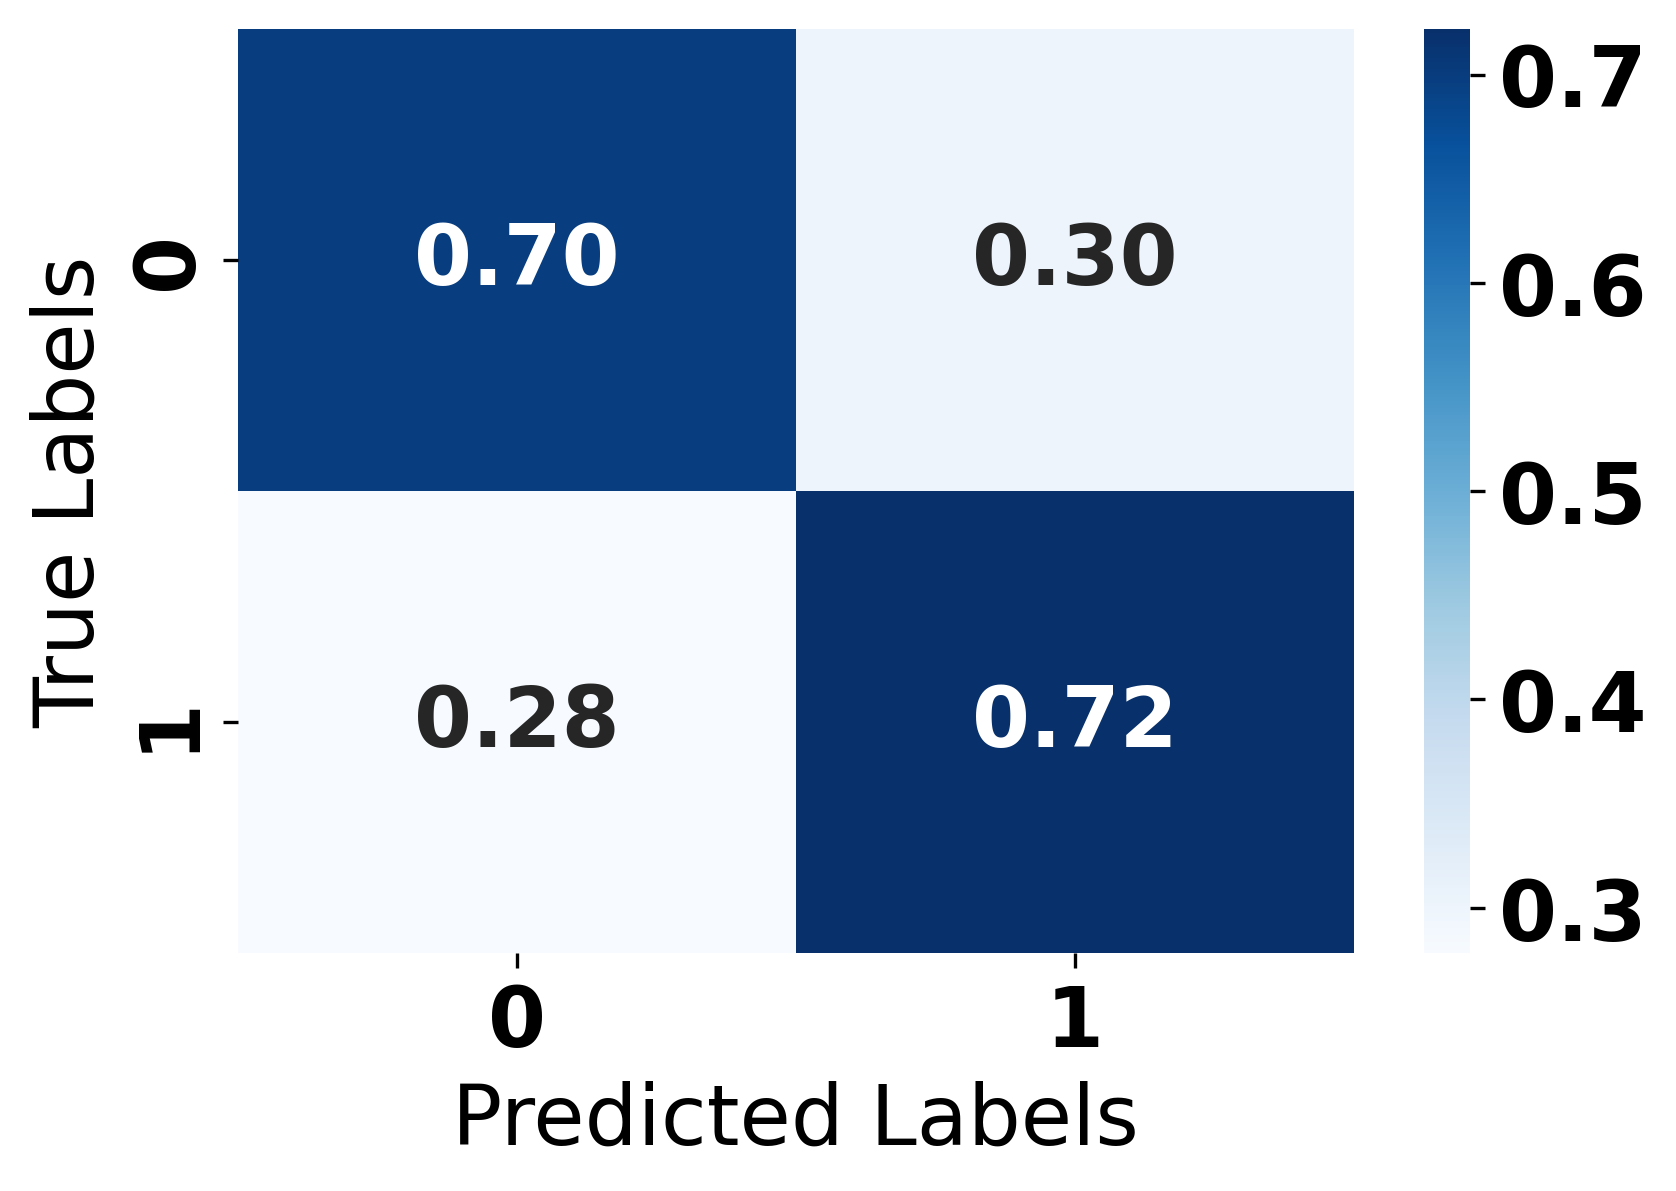

In [ ]:
# Predict probabilities on test data
y_pred_prob = novel_model_instance.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
"""
# Save the model to a file
novel_model_instance.save('/content/drive/MyDrive/Cognition Dysfunction/Dataset/CSL/model/NHIS-SCD.h5')
"""

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
novel_model_instance = load_model('/content/drive/MyDrive/Cognition Dysfunction/Dataset/CSL/model/NHIS-SCD.h5')

202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Confidence Scores for each prediction:
[[0.73072857]
 [0.8804019 ]
 [0.53407353]
 ...
 [0.8155649 ]
 [0.71253246]
 [0.86023015]]


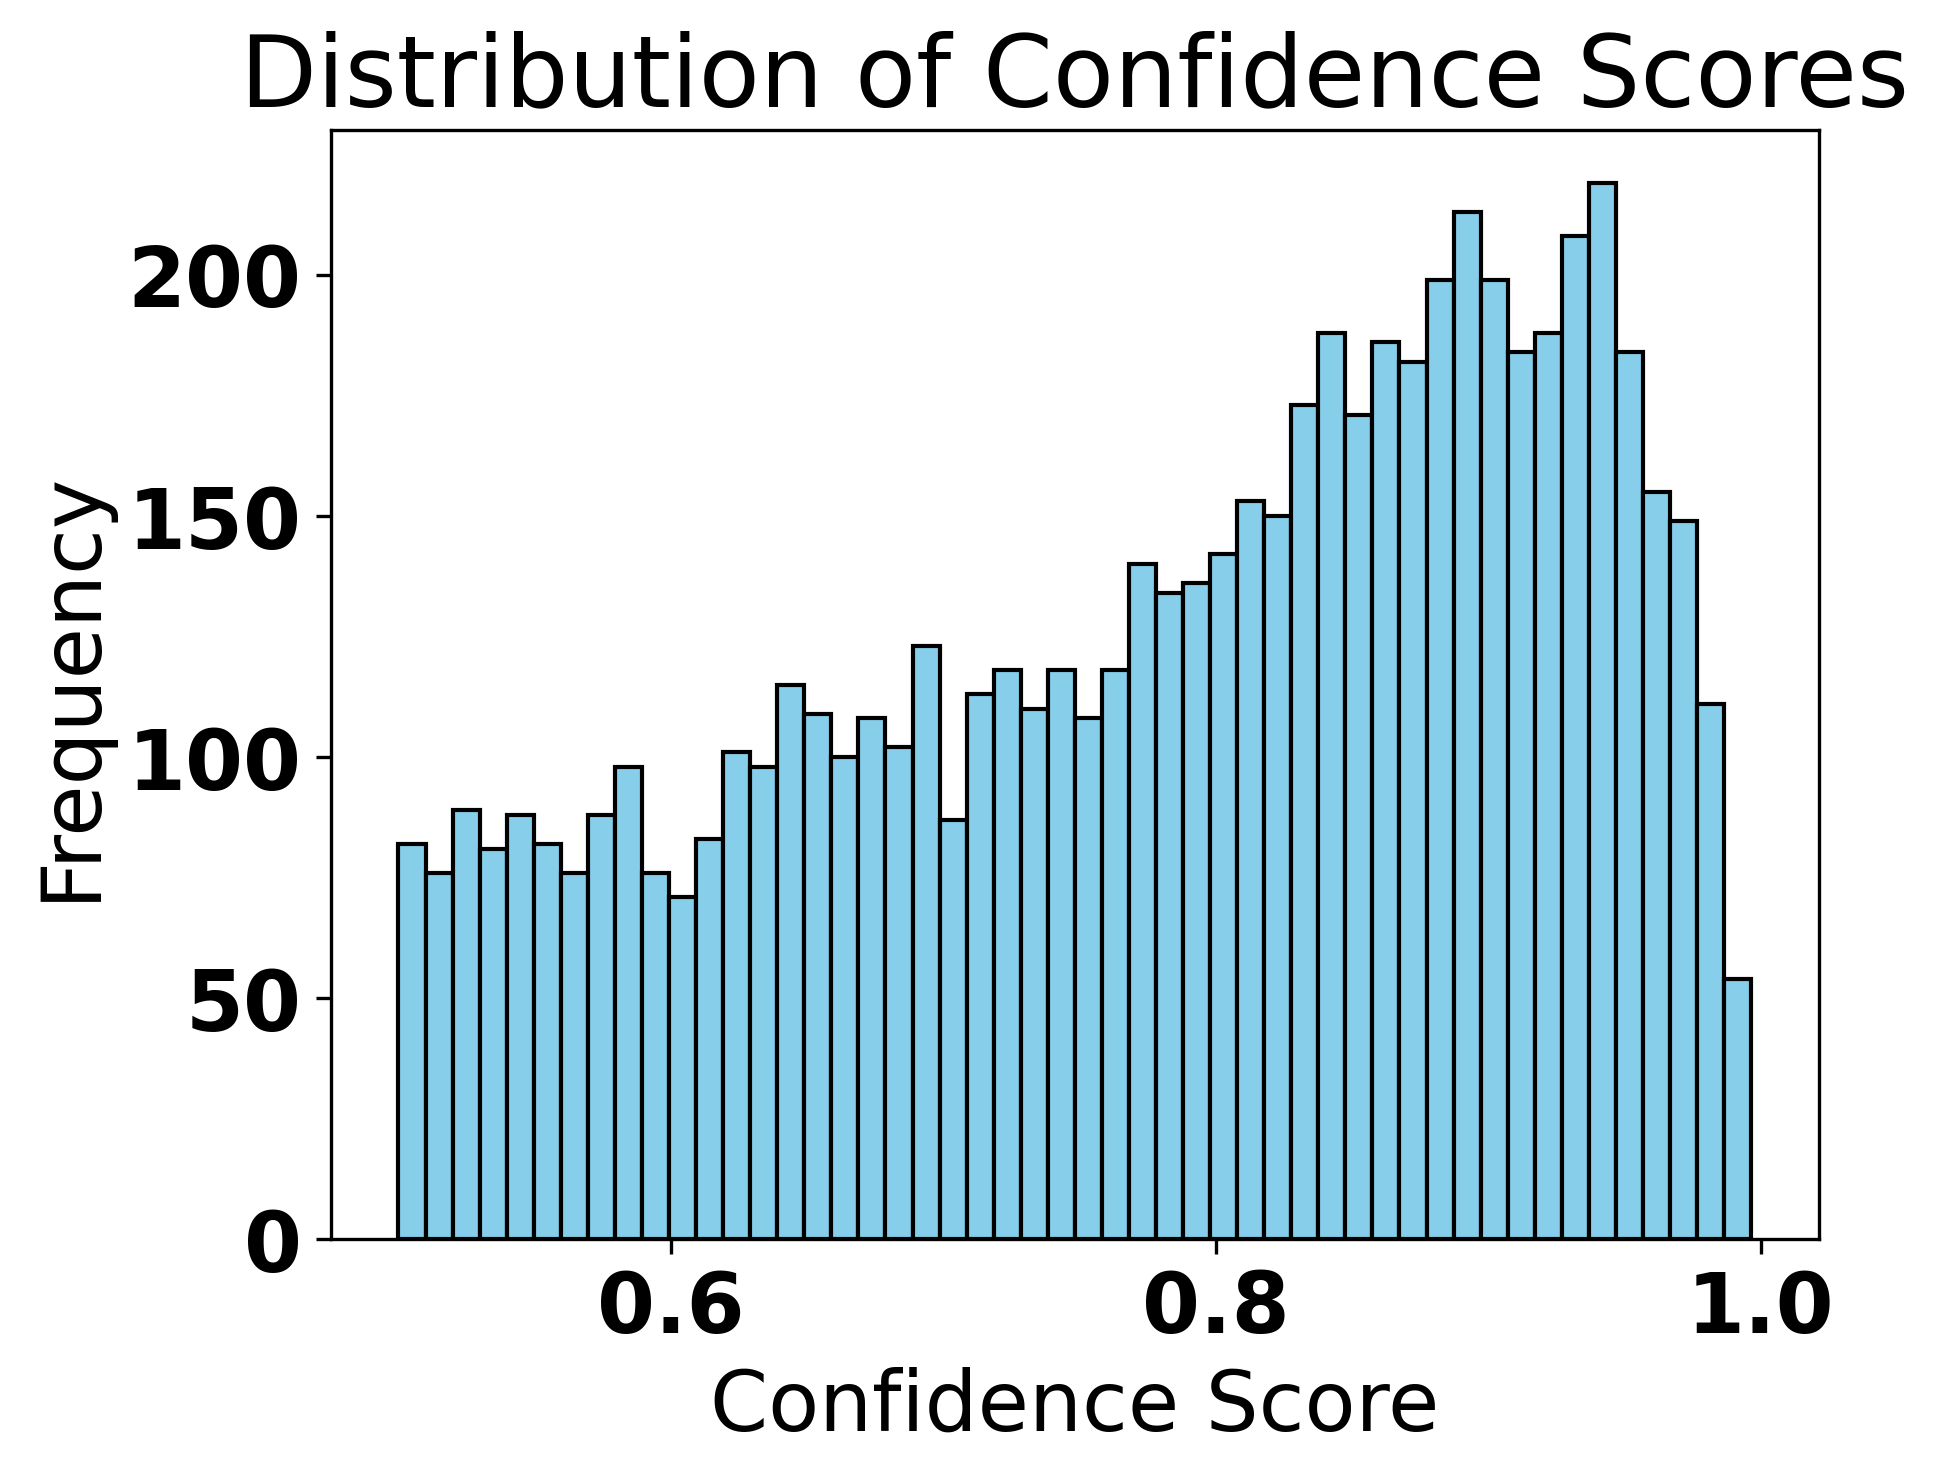

In [ ]:
# Predict probabilities on test data
y_pred_prob = novel_model_instance.predict(x_test)

# Get the predicted class labels using the threshold 0.5
y_pred_class = np.where(y_pred_prob > 0.5, 1, 0)

# Extract the confidence scores for the predicted class
confidence_scores = np.where(y_pred_class == 1, y_pred_prob, 1 - y_pred_prob)

# Now `confidence_scores` contains the confidence scores for each prediction
print("Confidence Scores for each prediction:")
print(confidence_scores)

# To visualize the distribution of confidence scores
plt.hist(confidence_scores, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Confidence Scores')
plt.xlabel('Confidence Score')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Calculate the mean confidence score for all predictions
mean_confidence = np.mean(confidence_scores)
print(f"Mean Confidence Score: {mean_confidence:.2f}")

# Calculate mean confidence for each class
mean_confidence_class_0 = np.mean(confidence_scores[y_pred_class == 0])
mean_confidence_class_1 = np.mean(confidence_scores[y_pred_class == 1])
print(f"Mean Confidence Score for Class 0: {mean_confidence_class_0:.2f}")
print(f"Mean Confidence Score for Class 1: {mean_confidence_class_1:.2f}")

Mean Confidence Score: 0.79
Mean Confidence Score for Class 0: 0.80
Mean Confidence Score for Class 1: 0.76


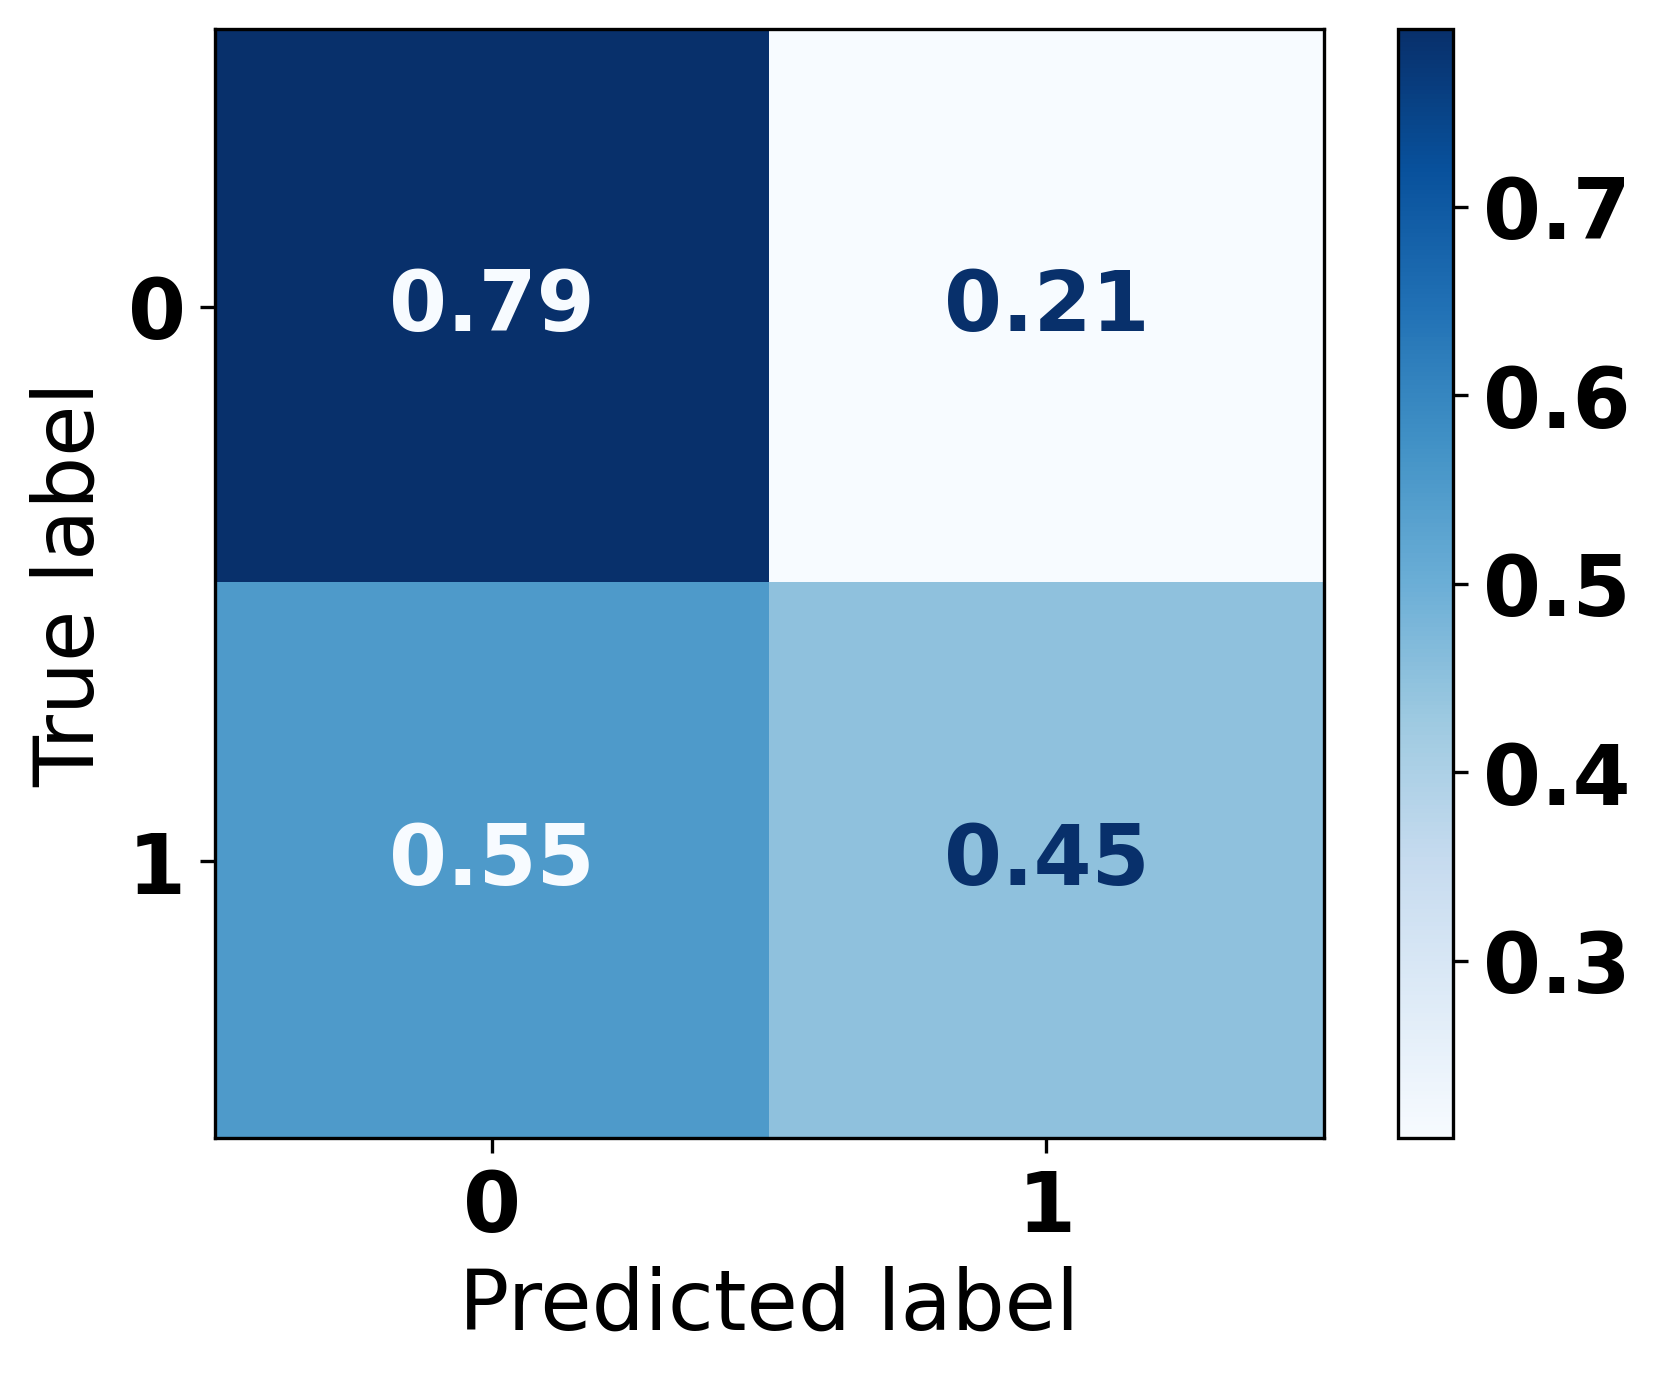

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.94      0.79      0.86      5966
     Class 1       0.16      0.45      0.24       532

    accuracy                           0.77      6498
   macro avg       0.55      0.62      0.55      6498
weighted avg       0.88      0.77      0.81      6498

Train Accuracy: 0.9999465269236939
Test Accuracy: 0.7659279778393352


In [ ]:
# Create and fit the Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(random_state=7)
DT.fit(x_train, y_train)

# Predict on the test set
y_pred = DT.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=DT.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Calculate train accuracy
y_train_pred = DT.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(DT, '/content/drive/MyDrive/Cognition Dysfunction/Dataset/CSL/model/DT-NHIS.h5')
"""

['/content/drive/MyDrive/Cognition Dysfunction/Dataset/CSL/model/DT-NHIS.h5']

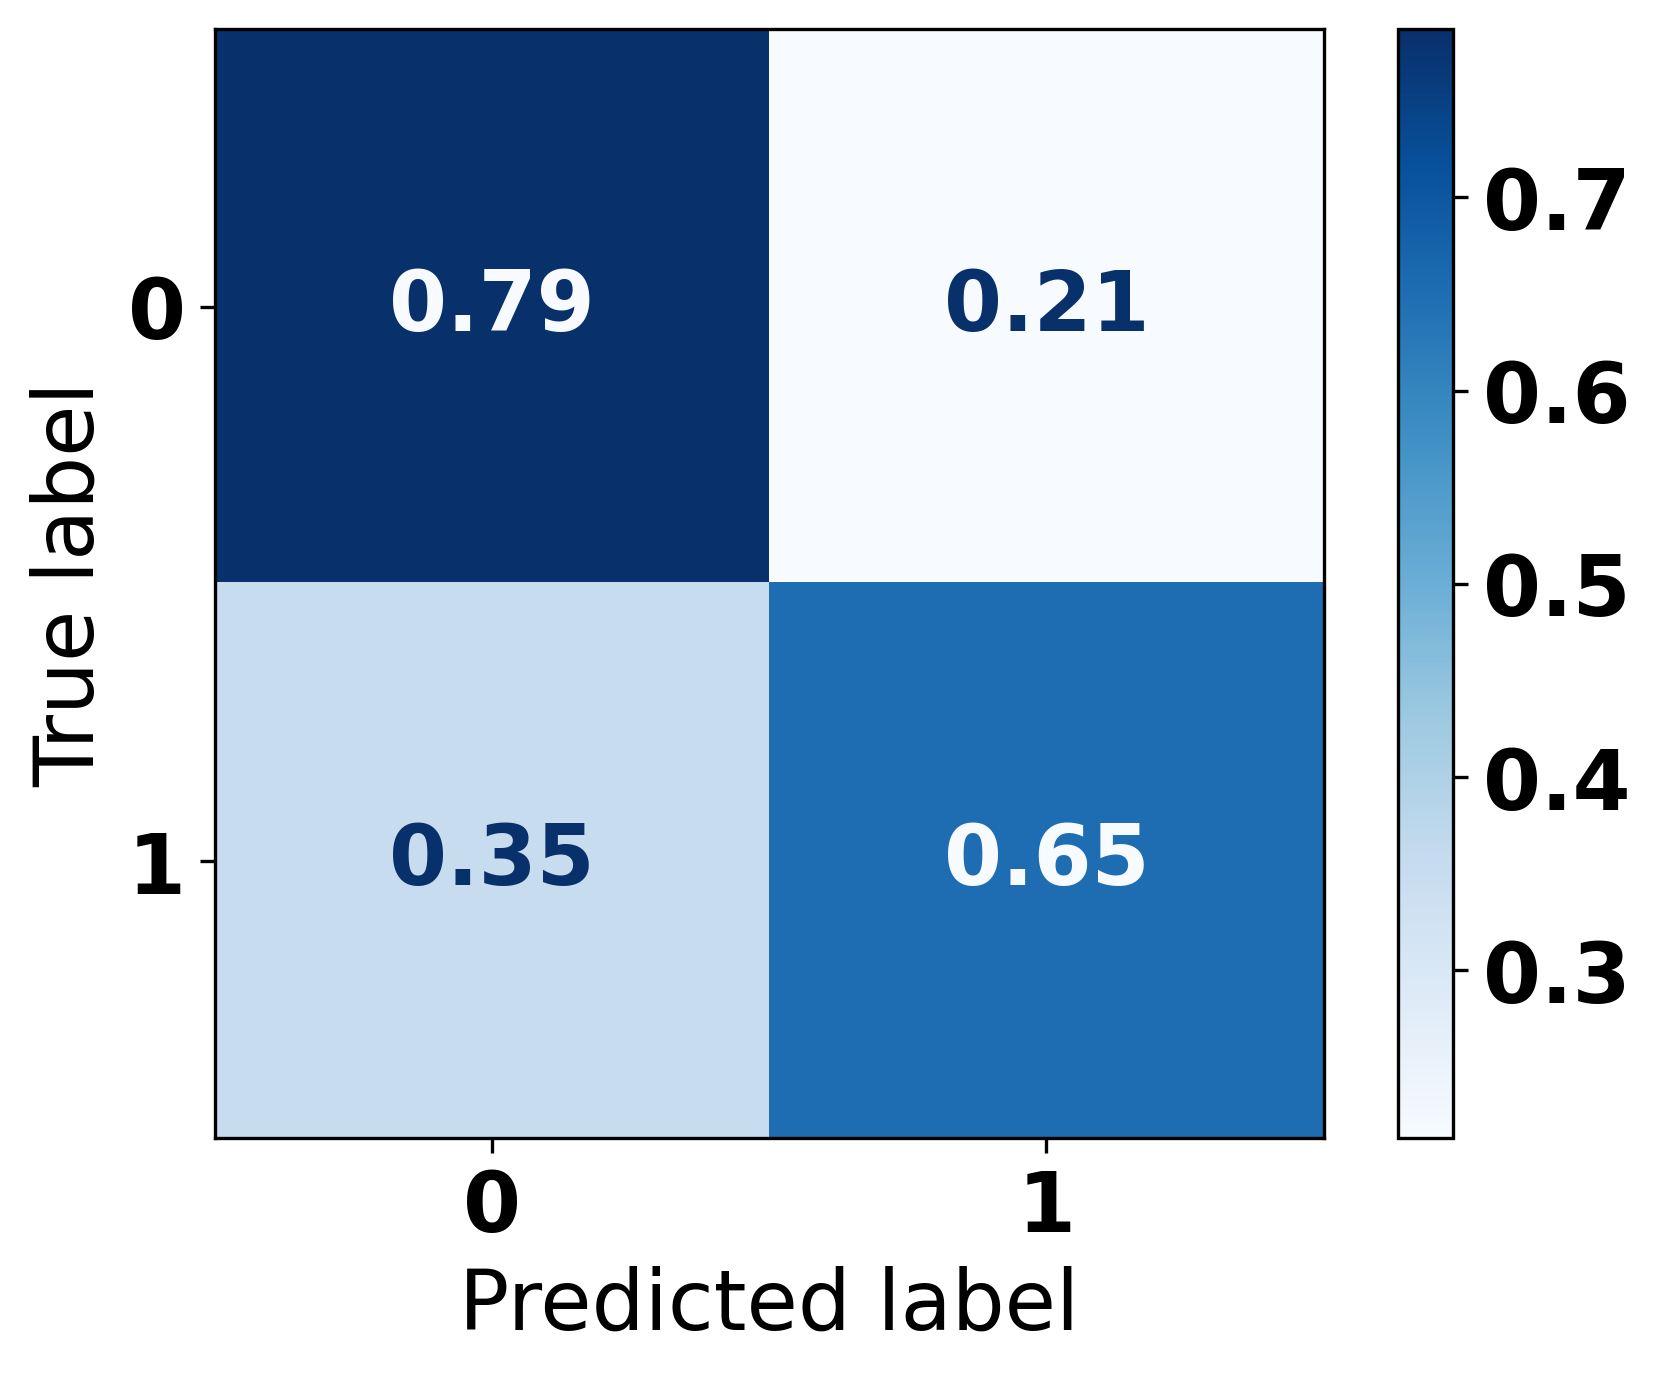

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.96      0.79      0.87      5966
     Class 1       0.21      0.65      0.32       532

    accuracy                           0.78      6498
   macro avg       0.59      0.72      0.59      6498
weighted avg       0.90      0.78      0.82      6498

Train Accuracy: 0.748943906742955
Test Accuracy: 0.775777162203755


In [ ]:
# Create an RUSBoost classifier
from imblearn.ensemble import RUSBoostClassifier

rusboost = RUSBoostClassifier(n_estimators=10, random_state=42)

# Fit the classifier to the training data
rusboost.fit(x_train, y_train)

# Predicting the output on the test dataset
y_pred = rusboost.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rusboost.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Calculate train accuracy
y_train_pred = rusboost.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(rusboost, '/content/drive/MyDrive/Cognition Dysfunction/Dataset/CSL/model/rusboost-NHIS.h5')
"""

['/content/drive/MyDrive/Cognition Dysfunction/Dataset/CSL/model/rusboost-NHIS.h5']

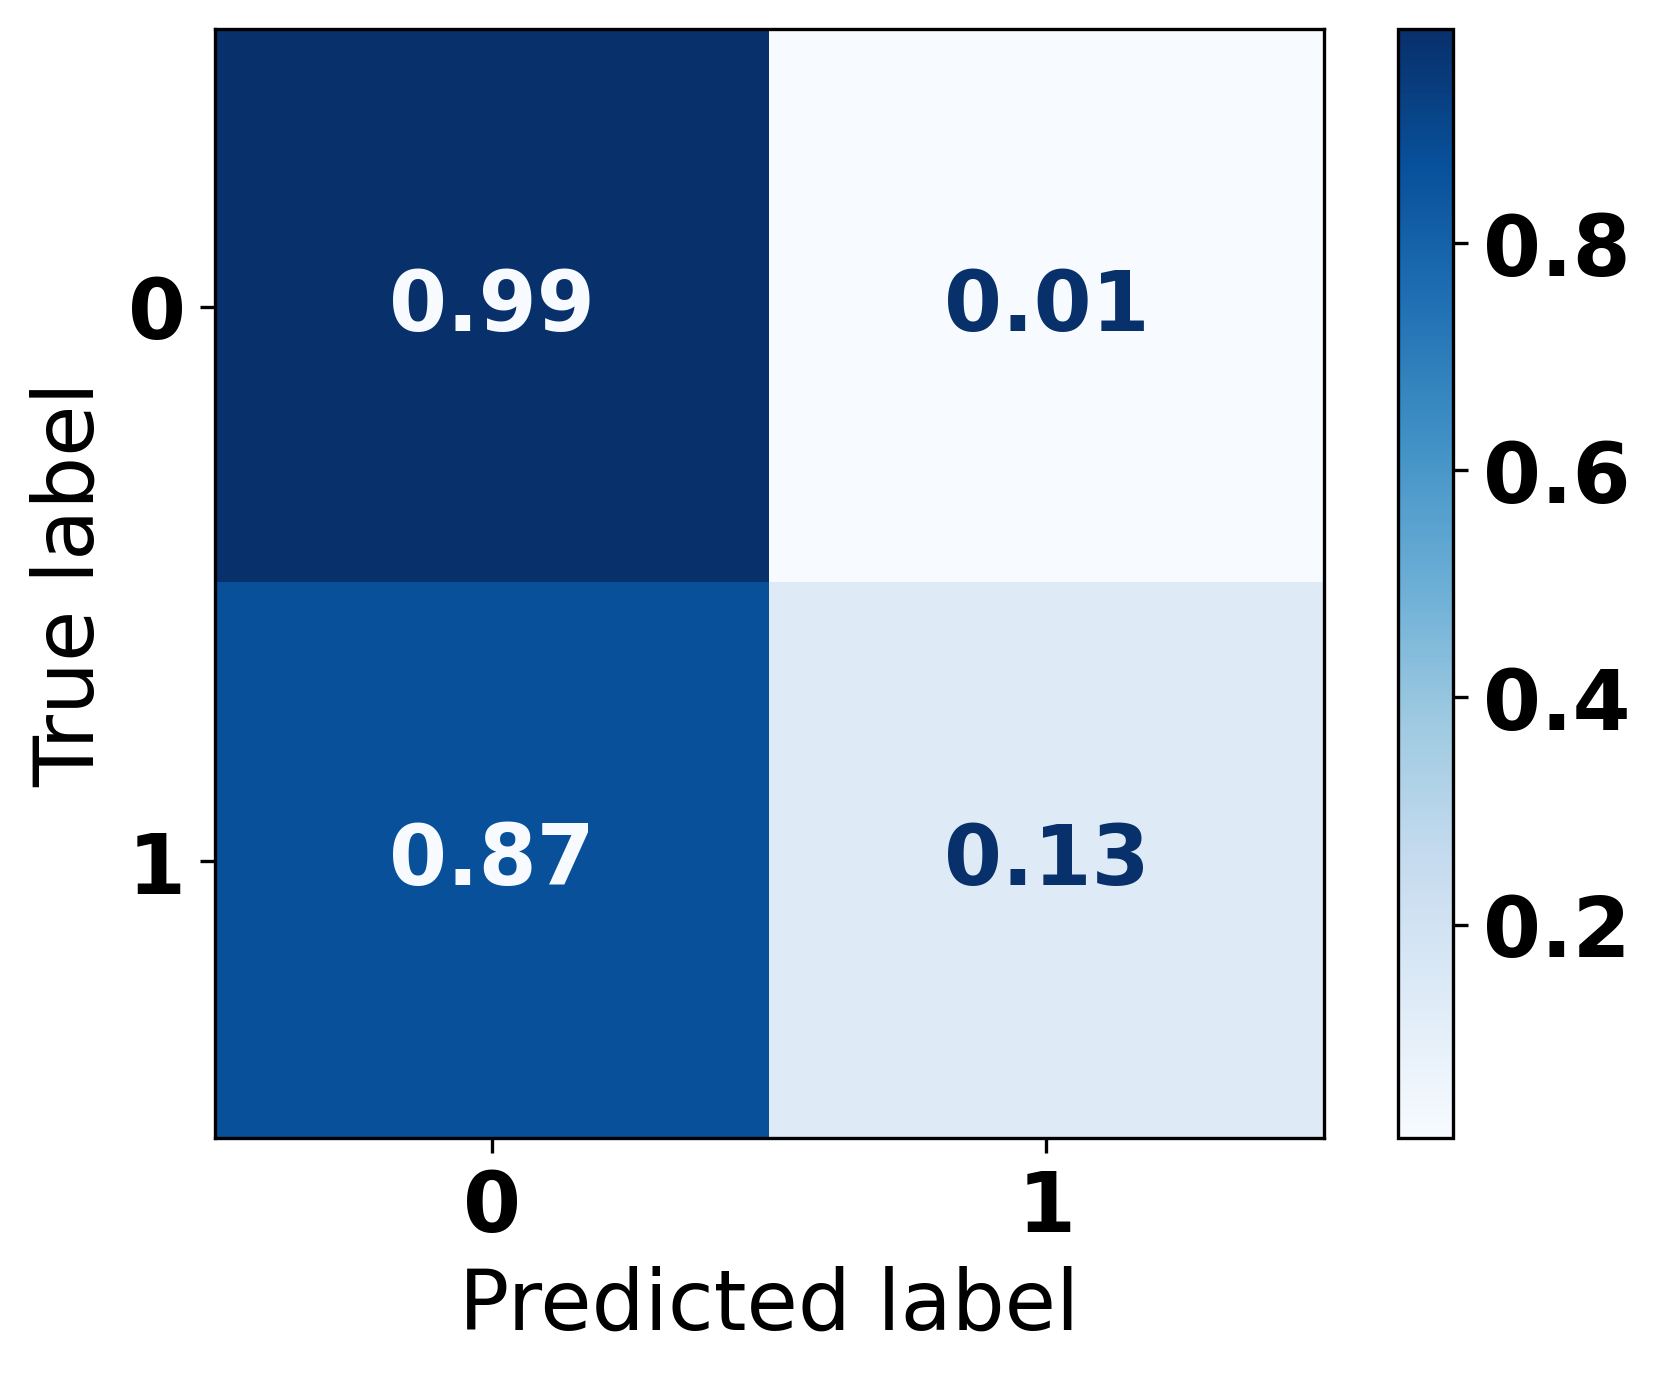

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96      5966
           1       0.49      0.13      0.21       532

    accuracy                           0.92      6498
   macro avg       0.71      0.56      0.58      6498
weighted avg       0.89      0.92      0.90      6498

Train Accuracy: 0.7683011603657558
Test Accuracy: 0.9178208679593721


In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(max_depth=2, random_state=0)

# Fit the classifier to the training data
y_pred = RF.fit(x_train, y_train).predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RF.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate train accuracy
y_train_pred = RF.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(RF, '/content/drive/MyDrive/Cognition Dysfunction/Dataset/CSL/model/RF-NHIS.h5')
"""

['/content/drive/MyDrive/Cognition Dysfunction/Dataset/CSL/model/RF-NHIS.h5']

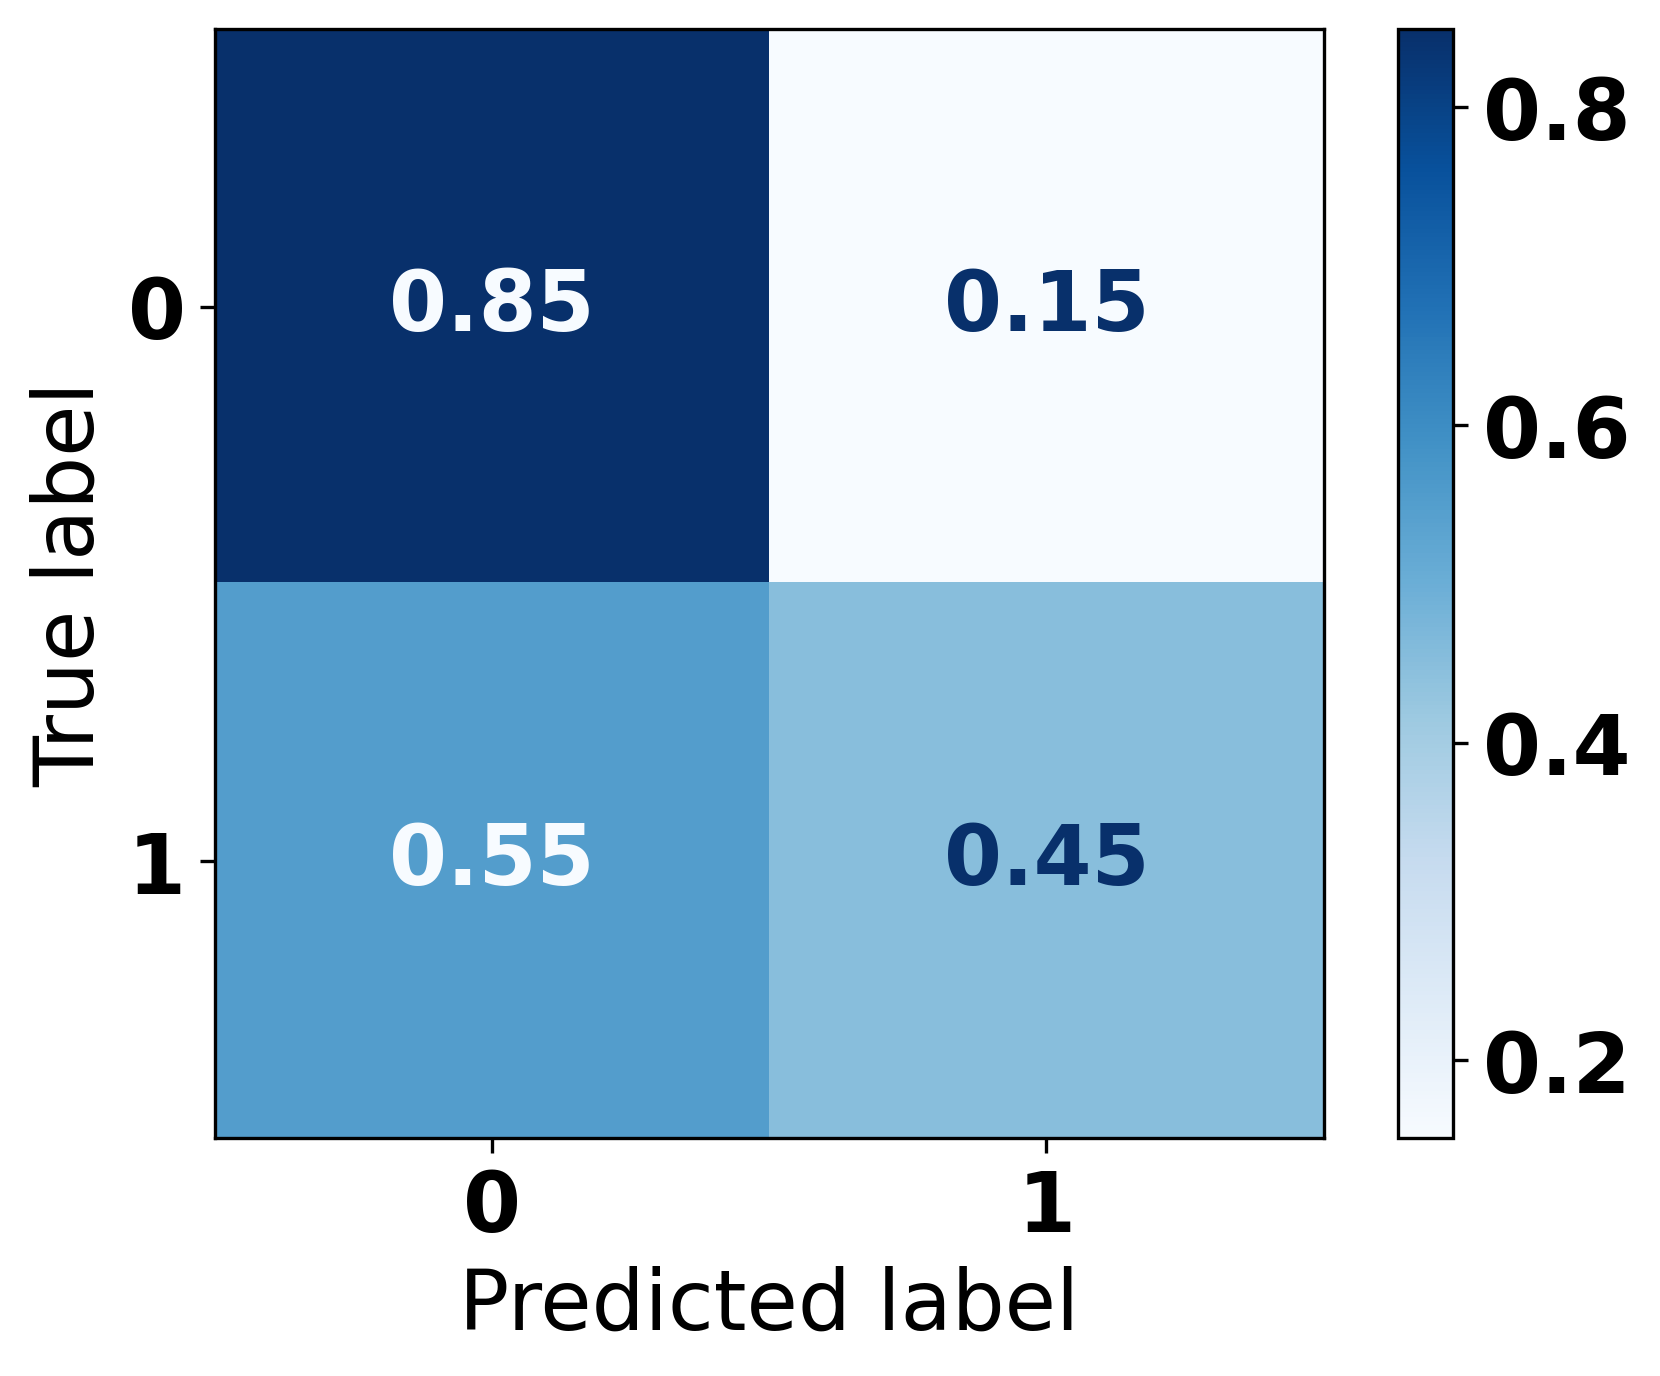

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.85      0.89      5966
           1       0.21      0.45      0.29       532

    accuracy                           0.82      6498
   macro avg       0.58      0.65      0.59      6498
weighted avg       0.89      0.82      0.84      6498

Train Accuracy: 0.7533286990000535
Test Accuracy: 0.8162511542012927


In [ ]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()

# Fit the classifier to the training data
y_pred = GNB.fit(x_train, y_train).predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=GNB.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate train accuracy
y_train_pred = GNB.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(GNB, '/content/drive/MyDrive/Cognition Dysfunction/Dataset/CSL/model/GNB-NHIS.h5')
"""

['/content/drive/MyDrive/Cognition Dysfunction/Dataset/CSL/model/GNB-NHIS.h5']

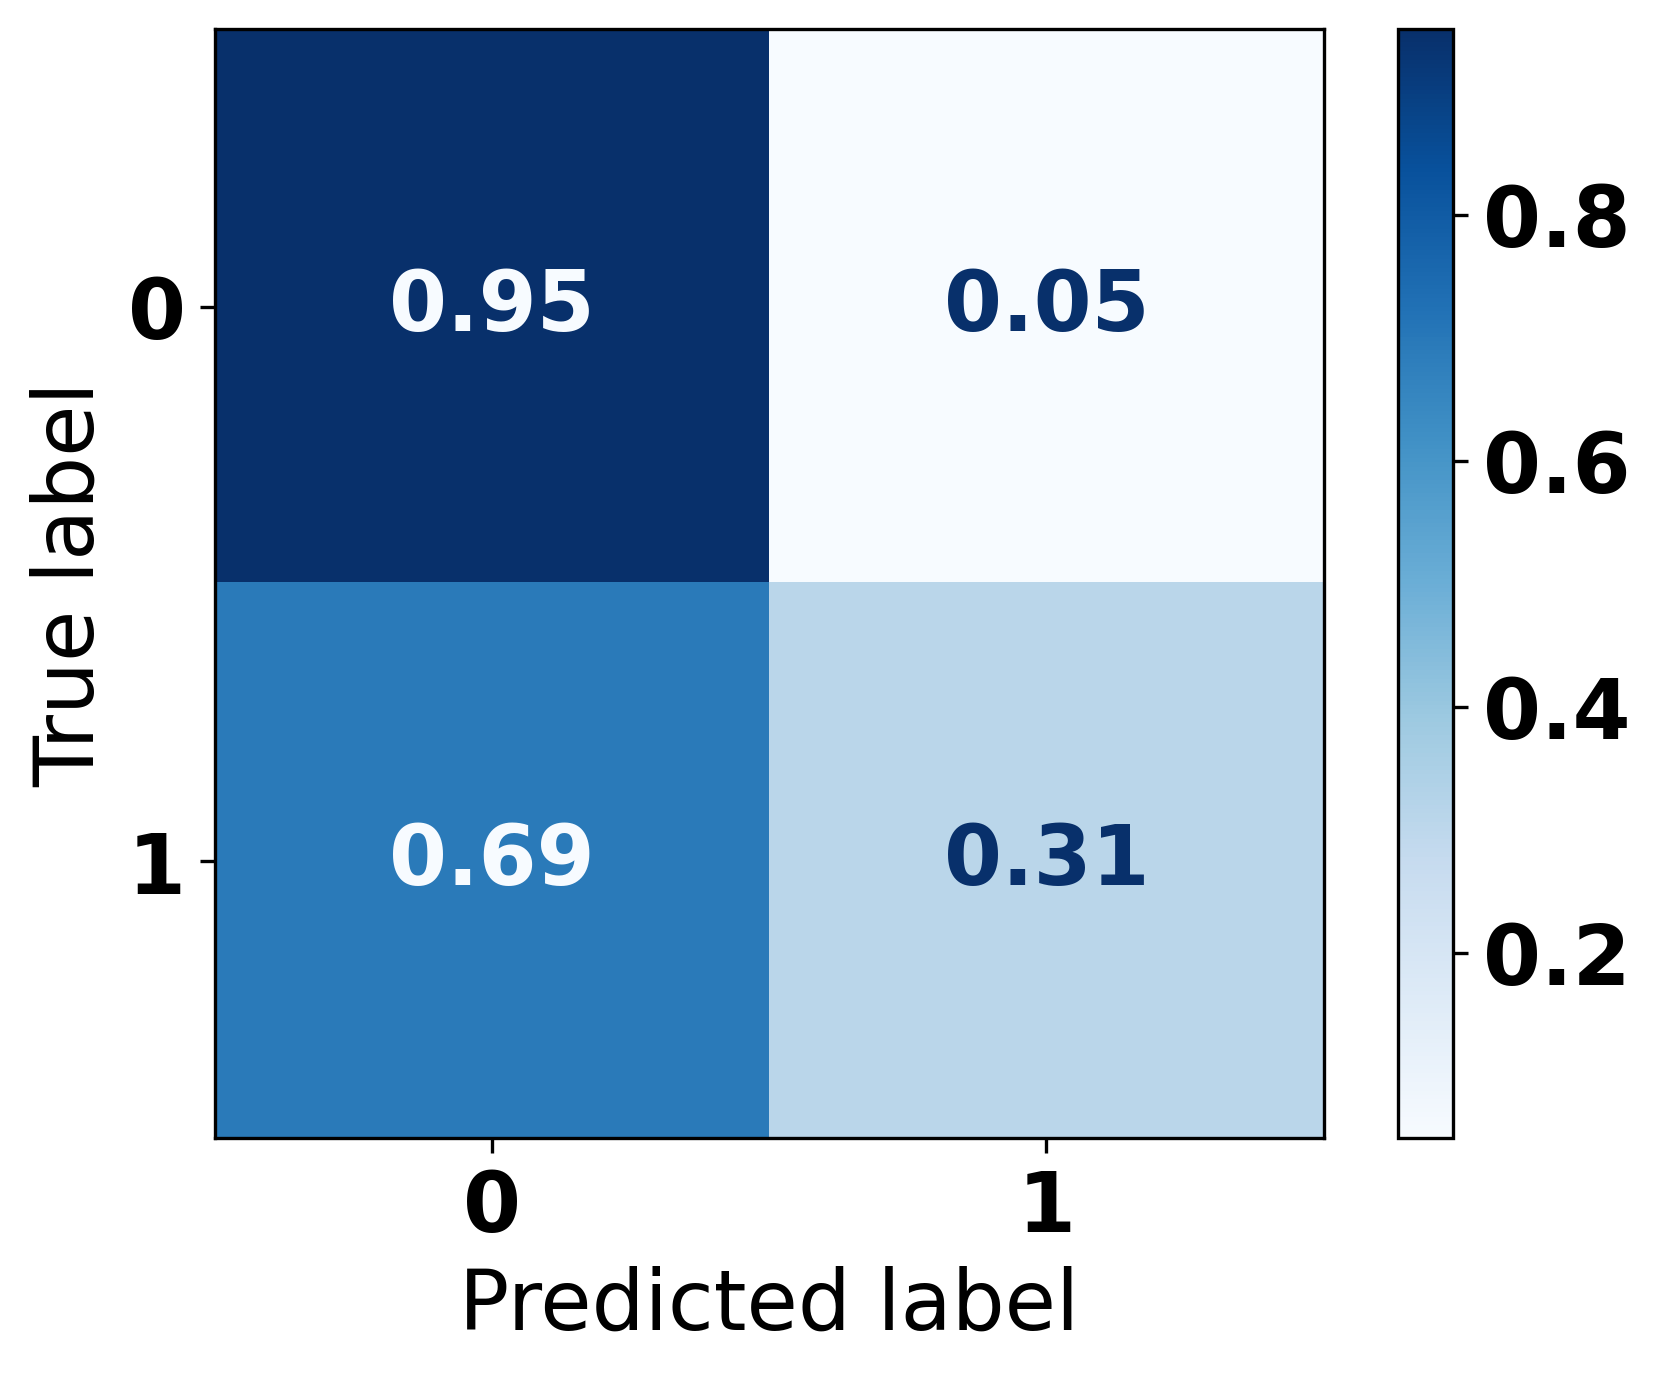

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94      5966
           1       0.36      0.31      0.33       532

    accuracy                           0.90      6498
   macro avg       0.65      0.63      0.64      6498
weighted avg       0.89      0.90      0.89      6498

Train Accuracy: 0.7864285332335169
Test Accuracy: 0.8981224992305324


In [ ]:
# Create an AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier

Adaboost = AdaBoostClassifier(n_estimators=17, learning_rate=0.4, random_state=33)
# Adaboost = AdaBoostClassifier(n_estimators=50, random_state=42)

# Train the AdaBoost classifier
Adaboost.fit(x_train, y_train)

# Make predictions on the test set
y_pred = Adaboost.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Adaboost.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate train accuracy
y_train_pred = Adaboost.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(Adaboost, '/content/drive/MyDrive/Cognition Dysfunction/Dataset/CSL/model/Adaboost-NHIS.h5')
"""

['/content/drive/MyDrive/Cognition Dysfunction/Dataset/CSL/model/Adaboost-NHIS.h5']

### Deep Learning Approach

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=1, max_iter=20).fit(x_train, y_train)
y_pred = clf.predict_proba(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Normalized Confusion Matrix:
[[0.96010727 0.03989273]
 [0.73308271 0.26691729]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.94      0.96      0.95      5966
     Class 1       0.37      0.27      0.31       532

    accuracy                           0.90      6498
   macro avg       0.65      0.61      0.63      6498
weighted avg       0.89      0.90      0.90      6498



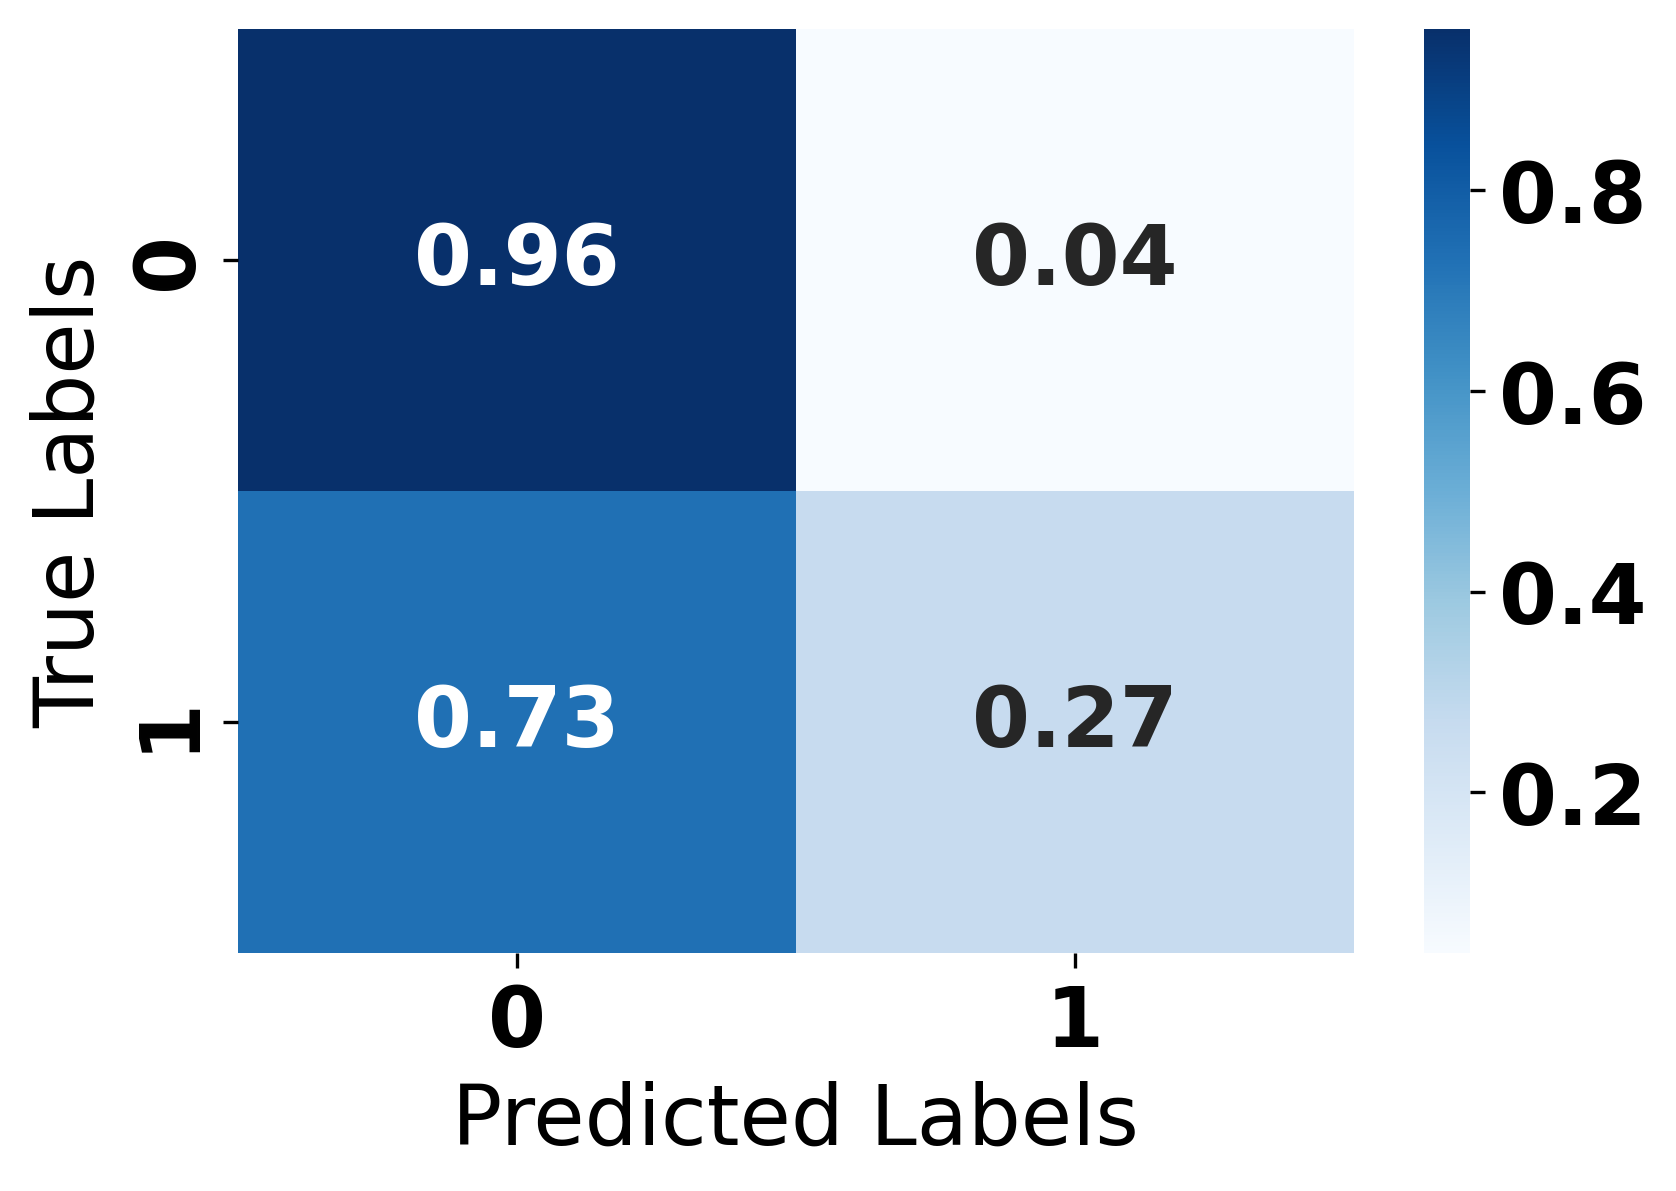

In [ ]:
# Predict probabilities on test data
y_pred_prob = clf.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(clf, '/content/drive/MyDrive/Cognition Dysfunction/Dataset/CSL/model/MLP.h5')
"""

['/content/drive/MyDrive/Cognition Dysfunction/Dataset/CSL/model/MLP.h5']

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Add

# Input layer
input_layer = Input(shape=(x_train.shape[1], 1))

# First convolutional block
conv1 = Conv1D(filters=32, kernel_size=3, activation='relu', padding='same')(input_layer)
pool1 = MaxPooling1D(pool_size=2)(conv1)

# Second convolutional block with residual connection
conv2 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(pool1)
conv2 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(conv2)

# Residual connection
residual1 = Conv1D(filters=64, kernel_size=1, activation='relu', padding='same')(pool1)
residual1 = Add()([residual1, conv2])
pool2 = MaxPooling1D(pool_size=2)(residual1)

# Flatten layer
flatten = Flatten()(pool2)

# Dense layers
dense1 = Dense(128, activation='relu')(flatten)
dense2 = Dense(64, activation='relu')(dense1)

# Output layer
output = Dense(1, activation='sigmoid')(dense2)

# Create the model
model = Model(inputs=input_layer, outputs=output)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 12s 38ms/step - accuracy: 0.7111 - loss: 0.6236 - val_accuracy: 0.9154 - val_loss: 0.2650
Epoch 2/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.7683 - loss: 0.4997 - val_accuracy: 0.9027 - val_loss: 0.2725
Epoch 3/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.7762 - loss: 0.4778 - val_accuracy: 0.8347 - val_loss: 0.4257
Epoch 4/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.7771 - loss: 0.4802 - val_accuracy: 0.8683 - val_loss: 0.3327
Epoch 5/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.7826 - loss: 0.4693 - val_accuracy: 0.8703 - val_loss: 0.3562
Epoch 6/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.7808 - loss: 0.4702 - val_accuracy: 0.9000 - val_loss: 0.2712
Epoch 7/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.7847 - loss: 0.4702 - val_accuracy: 0.8556 - val_loss: 0.3443
Epoch 8/10
147/147 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.7902 - loss: 0.4583 - val_acc

204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Normalized Confusion Matrix:
[[0.9359705  0.0640295 ]
 [0.64473684 0.35526316]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.94      0.94      0.94      5966
     Class 1       0.33      0.36      0.34       532

    accuracy                           0.89      6498
   macro avg       0.64      0.65      0.64      6498
weighted avg       0.89      0.89      0.89      6498



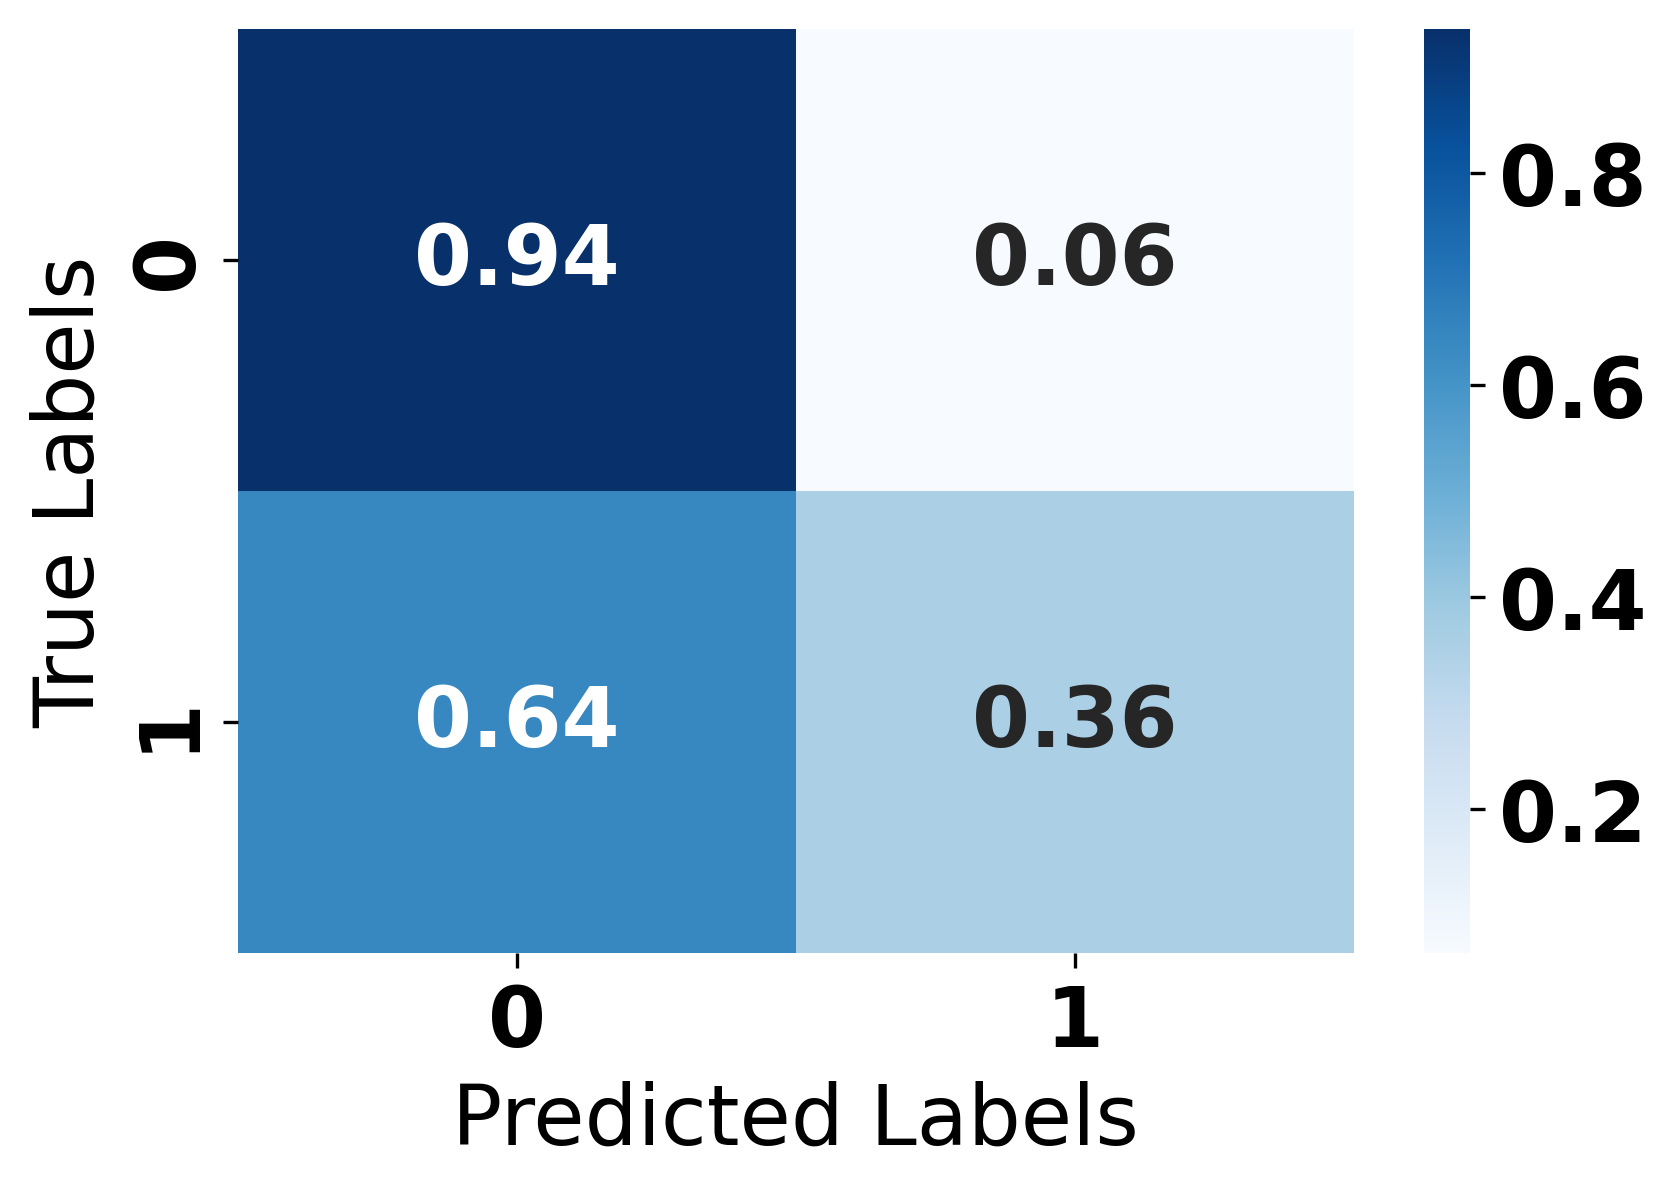

In [ ]:
# Predict probabilities on test data
y_pred_prob = model.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
"""
# Save the model to a file
model.save('/content/drive/MyDrive/Cognition Dysfunction/Dataset/CSL/model/CNN.h5')
"""

In [ ]:
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Model

# Define the input shape based on your data
input_shape = (x_train.shape[1],)  # Assuming your input data is 1D

def create_complex_ann_model(input_shape):
    input_layer = Input(shape=input_shape)

    # Add fully connected layers with increasing complexity
    dense1 = Dense(256, activation='relu')(input_layer)
    dense1 = BatchNormalization()(dense1)
    dense1 = Dropout(0.5)(dense1)  # Adding dropout for regularization

    dense2 = Dense(128, activation='relu')(dense1)
    dense2 = BatchNormalization()(dense2)
    dense2 = Dropout(0.5)(dense2)

    dense3 = Dense(64, activation='relu')(dense2)
    dense3 = BatchNormalization()(dense3)

    output = Dense(1, activation='sigmoid')(dense3)

    model = Model(inputs=input_layer, outputs=output)
    return model

# Create the more complex ANN model
complex_ann_model = create_complex_ann_model(input_shape)

# Compile the model
complex_ann_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the more complex ANN model
complex_ann_model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

# Evaluate the more complex ANN model
loss, accuracy = complex_ann_model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/10
293/293 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.6773 - loss: 0.6465 - val_accuracy: 0.9012 - val_loss: 0.3152
Epoch 2/10
293/293 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.7691 - loss: 0.4960 - val_accuracy: 0.8961 - val_loss: 0.2868
Epoch 3/10
293/293 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7786 - loss: 0.4848 - val_accuracy: 0.9024 - val_loss: 0.2716
Epoch 4/10
293/293 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7778 - loss: 0.4788 - val_accuracy: 0.9149 - val_loss: 0.2575
Epoch 5/10
293/293 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7800 - loss: 0.4731 - val_accuracy: 0.8980 - val_loss: 0.2830
Epoch 6/10
293/293 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7762 - loss: 0.4735 - val_accuracy: 0.8473 - val_loss: 0.3802
Epoch 7/10
293/293 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7844 - loss: 0.4672 - val_accuracy: 0.8920 - val_loss: 0.2926
Epoch 8/10
293/293 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7790 - loss: 0.4677 - val_accurac

204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Normalized Confusion Matrix:
[[0.95859873 0.04140127]
 [0.7406015  0.2593985 ]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.94      0.96      0.95      5966
     Class 1       0.36      0.26      0.30       532

    accuracy                           0.90      6498
   macro avg       0.65      0.61      0.62      6498
weighted avg       0.89      0.90      0.89      6498



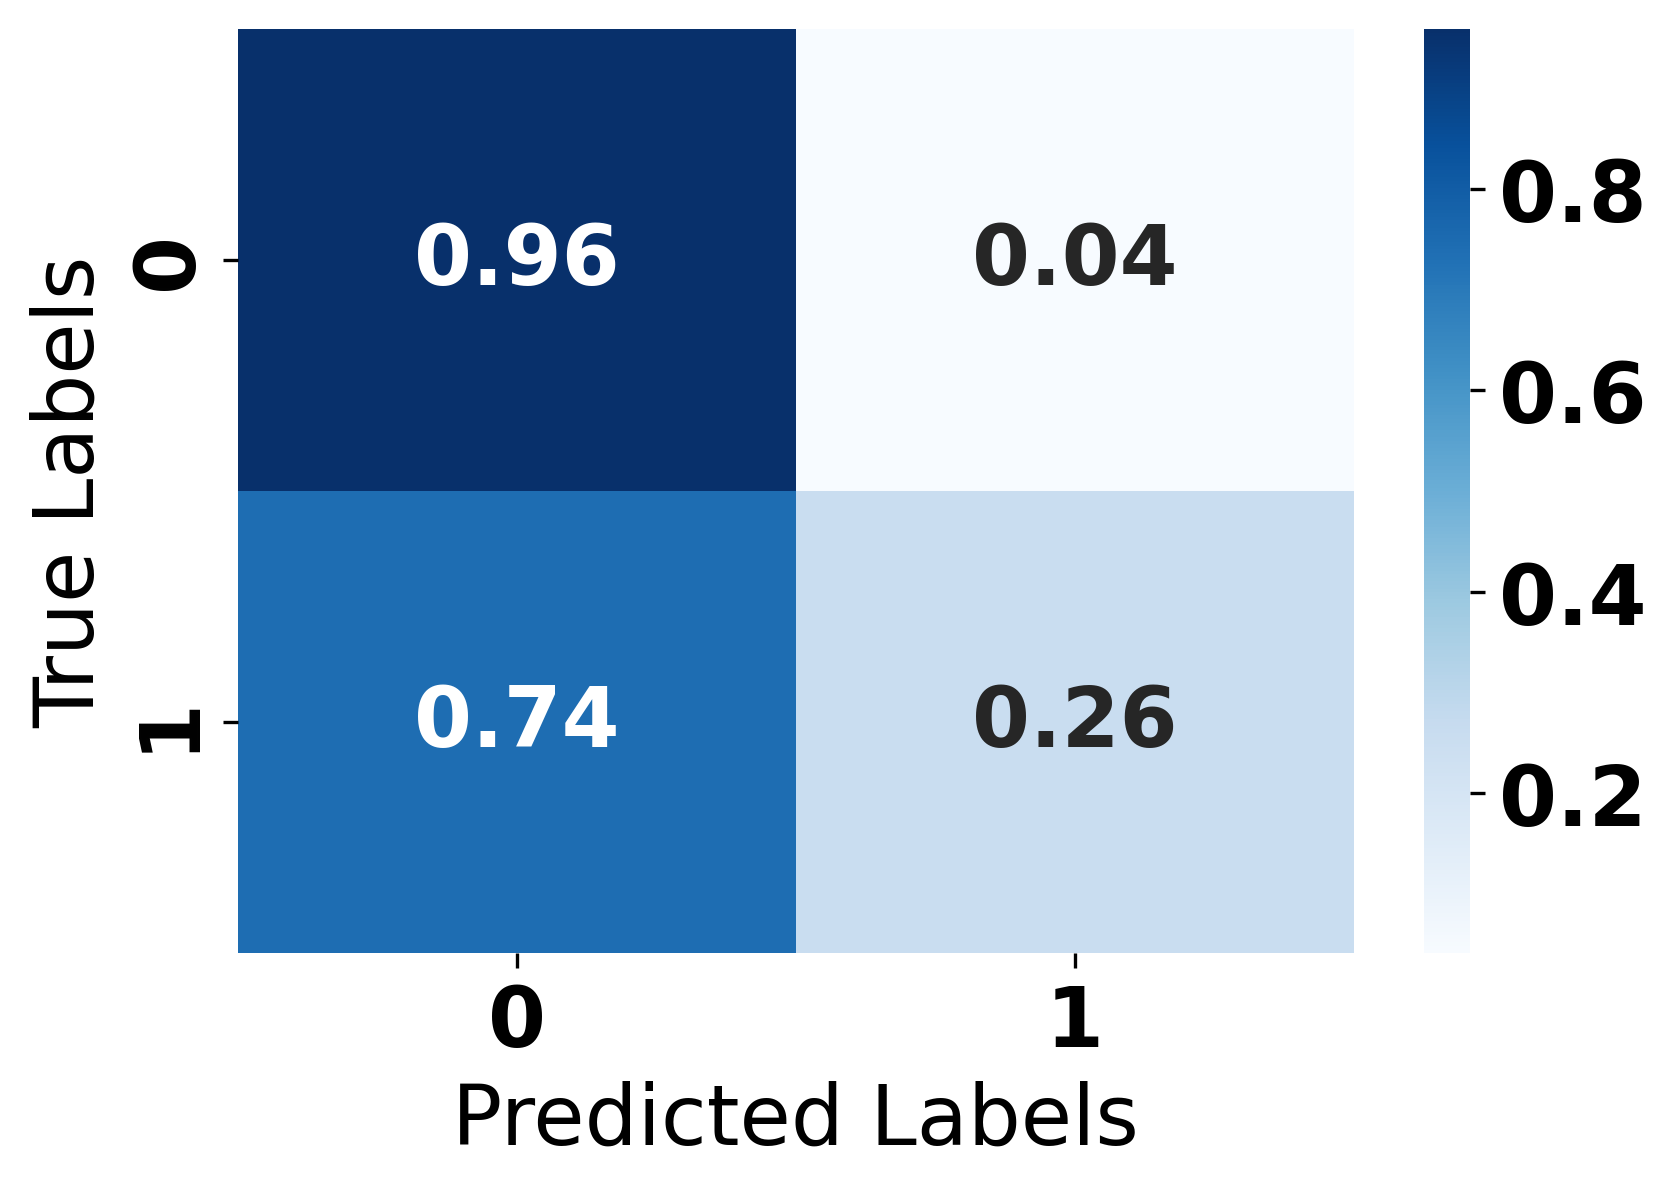

In [ ]:
# Predict probabilities on test data
y_pred_prob = complex_ann_model.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
"""
# Save the model to a file
complex_ann_model.save('/content/drive/MyDrive/Cognition Dysfunction/Dataset/CSL/model/ANN.h5')
"""

In [ ]:
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, BatchNormalization
from tensorflow.keras.models import Model
import tensorflow as tf
import numpy as np
from sklearn.utils import class_weight

# Define a function to calculate class weights with an increasing factor
def get_class_weights(y_train, factor):
    classes = np.unique(y_train)
    class_weights = class_weight.compute_class_weight('balanced', classes=classes, y=y_train)
    class_weights_dict = {c: w * factor for c, w in zip(classes, class_weights)}
    return class_weights_dict

# Define a function to create the base CNN model without residual connections
def base_cnn_no_residual_model(input_shape):
    input_layer = Input(shape=input_shape)

    conv1 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(input_layer)
    conv2 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(conv1)
    conv3 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(conv2)

    pool = MaxPooling1D(pool_size=2)(conv3)

    flatten = Flatten()(pool)

    dense1 = Dense(128, activation='relu')(flatten)
    dense1 = BatchNormalization()(dense1)

    dense2 = Dense(64, activation='relu')(dense1)
    dense2 = BatchNormalization()(dense2)

    output = Dense(1, activation='sigmoid')(dense2)

    model = Model(inputs=input_layer, outputs=output)
    return model

# Create the base CNN model without residual connections
input_shape = (x_train.shape[1], 1)
base_cnn_no_residual_model_instance = base_cnn_no_residual_model(input_shape)

# Compile the model
base_cnn_no_residual_model_instance.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Set an initial factor for class weight increase
factor = 1

# Train the base CNN model without residual connections for multiple epochs with increasing class weights
for epoch in range(10):
    class_weights_dict = get_class_weights(y_train, factor)
    base_cnn_no_residual_model_instance.fit(x_train, y_train, epochs=1, batch_size=64, validation_data=(x_test, y_test), class_weight=class_weights_dict)
    factor += 0.08  # Increase the factor for the next epoch

# Evaluate the base CNN model without residual connections
loss, accuracy = base_cnn_no_residual_model_instance.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

293/293 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.6713 - loss: 0.6156 - val_accuracy: 0.9192 - val_loss: 0.2603
293/293 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.7131 - loss: 0.6206 - val_accuracy: 0.2678 - val_loss: 1.1211
293/293 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.7255 - loss: 0.6394 - val_accuracy: 0.8783 - val_loss: 0.2977
293/293 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.7206 - loss: 0.6950 - val_accuracy: 0.7022 - val_loss: 0.6465
293/293 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.7280 - loss: 0.7260 - val_accuracy: 0.7378 - val_loss: 0.5190
293/293 ━━━━━━━━━━━━━━━━━━━━ 11s 37ms/step - accuracy: 0.7148 - loss: 0.7785 - val_accuracy: 0.9181 - val_loss: 0.5579
293/293 ━━━━━━━━━━━━━━━━━━━━ 11s 37ms/step - accuracy: 0.7203 - loss: 0.8215 - val_accuracy: 0.8681 - val_loss: 0.3042
293/293 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.7266 - loss: 0.8613 - val_accuracy: 0.7833 - val_loss: 0.4811
293/293 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accurac

204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Normalized Confusion Matrix:
[[0.81411331 0.18588669]
 [0.46804511 0.53195489]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.95      0.81      0.88      5966
     Class 1       0.20      0.53      0.29       532

    accuracy                           0.79      6498
   macro avg       0.58      0.67      0.59      6498
weighted avg       0.89      0.79      0.83      6498



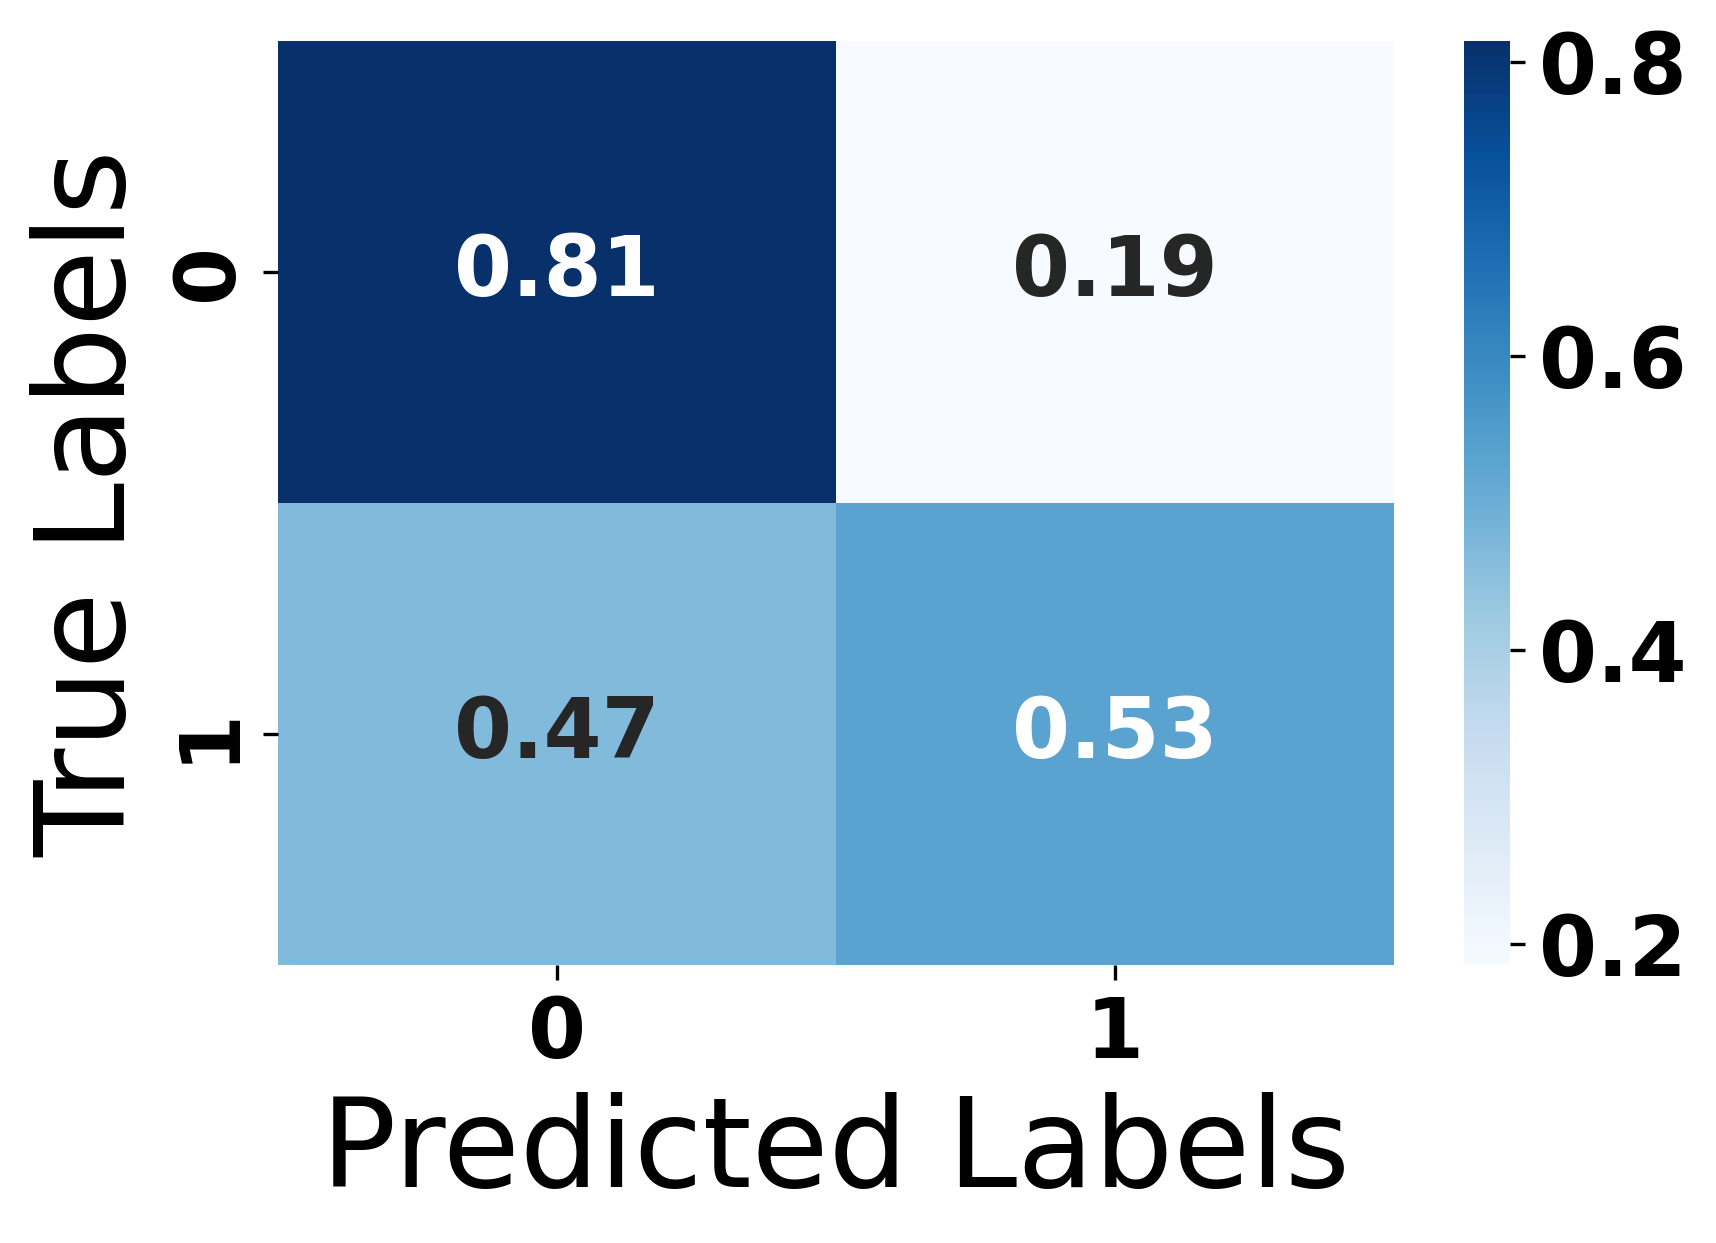

In [ ]:
# Predict probabilities on test data
y_pred_prob = base_cnn_no_residual_model_instance.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels', fontsize=30)
plt.ylabel('True Labels', fontsize=30)
plt.show()

In [ ]:
"""
# Save the model to a file
base_cnn_no_residual_model_instance.save('/content/drive/MyDrive/Cognition Dysfunction/Dataset/CSL/model/Base-CNN.h5')
"""